In [1]:
# Scanpy 설치
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 3.6 MB/s eta 0:00:00


In [2]:
!pip install scikit-misc==0.5.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 2.8 MB/s eta 0:00:00


In [3]:
!pip install celltypist==1.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 68.3 MB/s eta 0:00:00


In [4]:
!pip install harmonypy==0.0.10 scib-metrics==0.5.7

In [5]:
# 필요한 라이브러리 임포트
import os
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import matplotlib.pyplot as plt
import harmonypy

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [6]:
# scanpy 버전 확인
sc.__version__

'1.11.4'

In [7]:
# harmonypy 버전 확인
harmonypy.__version__

'0.0.10'

In [12]:
# 파일 로딩
base_path = '/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW'

adata1 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt1681LinMinus')
adata2 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt1681LinPlus')
adata3 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt2087LinMinus')
adata4 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt2087LinPlus')
adata5 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt2148LinMinus')
adata6 = sc.read_10x_mtx('/content/drive/MyDrive/25_2/scgw_f25_miniProject/GSE174463_RAW/Pt2148LinPlus')


In [13]:
# 유전자 이름 중복으로 인한 오류 방지
# AnnData 객체 리스트
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6]

for adata in adata_list:
    adata.var_names_make_unique()
    print(adata)

AnnData object with n_obs × n_vars = 841 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 1968 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 1028 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 1033 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 874 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 3300 × 33538
    var: 'gene_ids', 'feature_types'


In [14]:
# 모든 6개의 샘플의 anndata를 하나의 anndata로 합치기
import anndata
adata = anndata.concat([adata1, adata2, adata3, adata4, adata5, adata6],
                       axis = 0,
                       join='inner',
                       label='batch_id',
                       index_unique='-',)

In [15]:
# 합쳐졌는지 확인
adata

AnnData object with n_obs × n_vars = 9044 × 33538
    obs: 'batch_id'

In [16]:
# batch id 할당 확인
adata.obs

,batch_id
AAACCCAAGTAGTCCT-1-0,0
AAACGAACATAGATGA-1-0,0
AAAGAACCAATGGGTG-1-0,0
AAAGGATGTATCCCAA-1-0,0
AAAGGATGTCCTCAGG-1-0,0
...,...
TTTGGTTTCCATCGTC-1-5,5
TTTGGTTTCGGAGTAG-1-5,5
TTTGGTTTCTTGATTC-1-5,5
TTTGTTGAGCTAGTTC-1-5,5


In [17]:
# 원본 데이터 저장
adata.raw = adata.copy()

In [18]:
# QC summary table 만들기 위해 전처리 전 통계 계산

adata_pre_filter = adata.copy()
# QC 매트릭스 계산
sc.pp.calculate_qc_metrics(adata_pre_filter, inplace = True)
adata_pre_filter.var['mt'] = adata_pre_filter.var_names.str.startswith('MT-')
print(adata_pre_filter.var_names[adata_pre_filter.var['mt']]) # 미토콘드리아 RNA만 선택되었는지 확인
# 각 세포의 % of mito content 계산
sc.pp.calculate_qc_metrics(adata_pre_filter, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# 논문에서 사용한 요소 사용: Median N Genes per Cell, Median Total UMI Counts, Median Mitochondrial Percentage, Total Number of Cells
qc_metrics = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt']
pre_median = adata_pre_filter.obs[qc_metrics].median()
pre_n_obs = adata_pre_filter.n_obs

Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')


In [19]:
# 작업중인 adata에 새로운 condition 열 추가하여 배치 별로 구체적 샘플명 기입
name_map = {'0': "Pt1681LinMinus", '1': "Pt1681LinPlus", '2':"Pt2087LinMinus",'3':"Pt2087LinPlus", '4':"Pt2148LinMinus", '5':"Pt2148LinPlus"}
adata.obs['condition'] = adata.obs['batch_id'].map(name_map)

In [20]:
adata.obs

,batch_id,condition
AAACCCAAGTAGTCCT-1-0,0,Pt1681LinMinus
AAACGAACATAGATGA-1-0,0,Pt1681LinMinus
AAAGAACCAATGGGTG-1-0,0,Pt1681LinMinus
AAAGGATGTATCCCAA-1-0,0,Pt1681LinMinus
AAAGGATGTCCTCAGG-1-0,0,Pt1681LinMinus
...,...,...
TTTGGTTTCCATCGTC-1-5,5,Pt2148LinPlus
TTTGGTTTCGGAGTAG-1-5,5,Pt2148LinPlus
TTTGGTTTCTTGATTC-1-5,5,Pt2148LinPlus
TTTGTTGAGCTAGTTC-1-5,5,Pt2148LinPlus


In [21]:
# QC 매트릭스 계산
sc.pp.calculate_qc_metrics(adata, inplace = True)

In [22]:
adata.obs

,batch_id,condition,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCCAAGTAGTCCT-1-0,0,Pt1681LinMinus,947,6.854355,3376.0,8.124743,45.764218,57.908768,70.023697,86.759479
AAACGAACATAGATGA-1-0,0,Pt1681LinMinus,918,6.823286,2989.0,8.003029,43.057879,55.336233,68.317163,86.015390
AAAGAACCAATGGGTG-1-0,0,Pt1681LinMinus,1376,7.227662,5200.0,8.556606,44.826923,61.480769,71.115385,83.153846
AAAGGATGTATCCCAA-1-0,0,Pt1681LinMinus,1163,7.059618,4034.0,8.302762,38.249876,50.123946,64.129896,82.944968
AAAGGATGTCCTCAGG-1-0,0,Pt1681LinMinus,716,6.575076,1869.0,7.533694,40.823970,53.183521,68.164794,88.443018
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCATCGTC-1-5,5,Pt2148LinPlus,2283,7.733684,8391.0,9.035034,43.916101,55.940889,64.318913,74.901680
TTTGGTTTCGGAGTAG-1-5,5,Pt2148LinPlus,1507,7.318540,7224.0,8.885303,51.411960,68.355482,76.578073,86.060354
TTTGGTTTCTTGATTC-1-5,5,Pt2148LinPlus,2381,7.775696,10184.0,9.228671,45.669678,60.388845,68.038099,77.602121
TTTGTTGAGCTAGTTC-1-5,5,Pt2148LinPlus,343,5.840642,503.0,6.222576,39.363817,51.689861,71.570577,100.000000


# QC 임계값을 찾는 이유와 두 메트릭의 의미


- Log-library size (total_counts):	각 세포의 RNA 분자 총량 (시퀀싱 깊이) 나타냄. 빈 방울 (Empty Droplet) 또는 매우 낮은 품질의 세포를 제거하는 기준으로 사용됩니다 (낮은 임계값 설정).

- Log-N genes per cell	각 세포에서 발현된 고유한 유전자 수 나타냄.	죽은 세포 (유전자 수가 적음) 또는 이중 세포(Doublet) (유전자 수가 비정상적으로 많음)를 제거하는 기준으로 사용됩니다 (낮은/높은 임계값 설정).

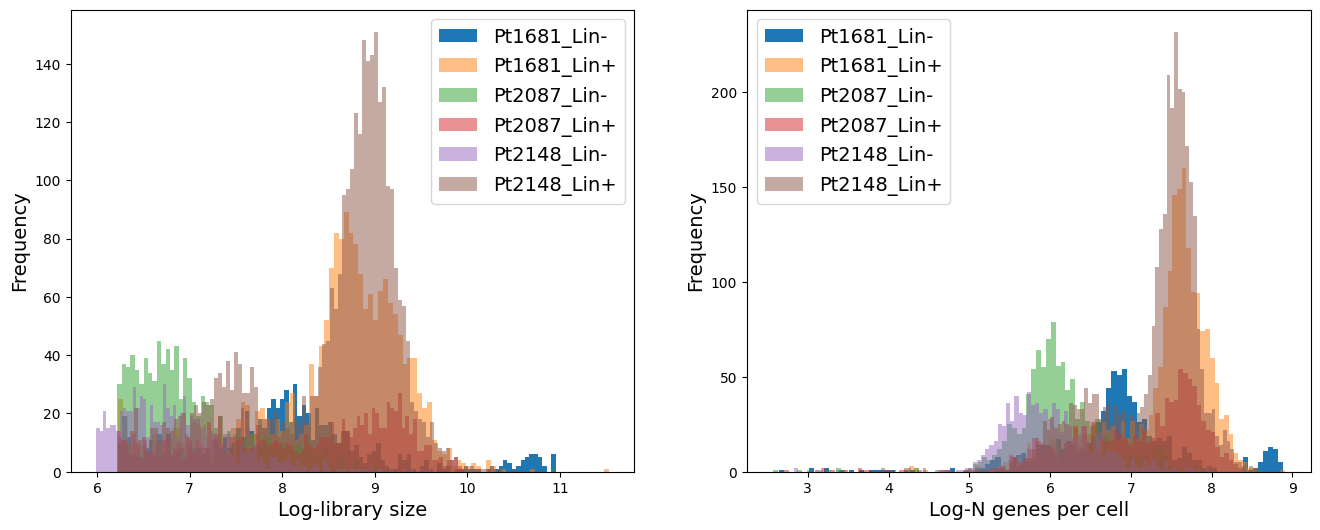

In [23]:
# QC threshold 선택을 위한 시각화:

# Log-library size (log1p_total_counts): 각 세포의 총 UMI (Unique Molecular Identifier) 카운트 (발현량) 로그 씌운 것. 세포별 RNA 총량
# Log-N genes per cell (log1p_n_genes_by_counts): 각 세포에서 발현된 유전자 수 로그 씌운 것. 하나의 세포가 얼마나 많은 종류의 유전자를 발현했는지

fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '3'], 100, label = "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['log1p_total_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('Log-library size', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)
###############
ax = fig.add_subplot(1, 2, 2)
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '3'], 100, label =  "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['log1p_n_genes_by_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('Log-N genes per cell', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)

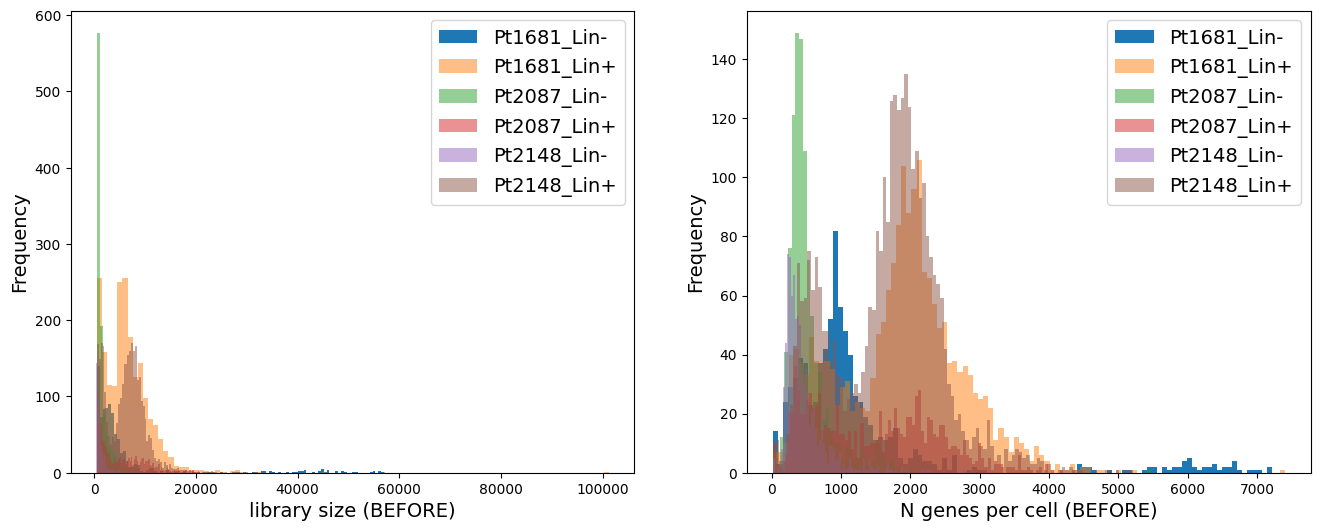

In [24]:
# QC threshold 선택을 위한 시각화2:

# library size (log1p_total_counts): 각 세포의 총 UMI (Unique Molecular Identifier) 카운트 (발현량) 로그 씌운 것. 세포별 RNA 총량
# N genes per cell (log1p_n_genes_by_counts): 각 세포에서 발현된 유전자 수 로그 씌운 것. 하나의 세포가 얼마나 많은 종류의 유전자를 발현했는지

fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '3'], 100, label = "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('library size (BEFORE)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)
###############
ax = fig.add_subplot(1, 2, 2)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '3'], 100, label =  "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('N genes per cell (BEFORE)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)

(0.0, 500.0)

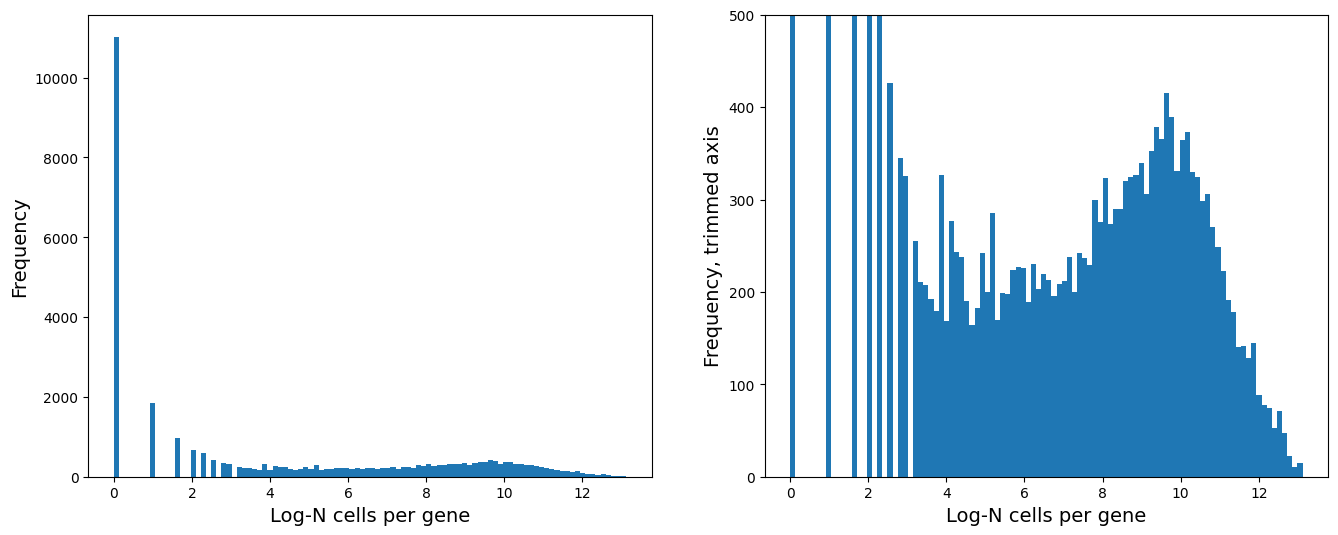

In [25]:
# Distribution of number of genes a cell is expressed in
fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(np.log2(adata.var['n_cells_by_counts'] + 1), 100)
ax.set_xlabel('Log-N cells per gene', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

ax = fig.add_subplot(1, 2, 2)
ax.hist(np.log2(adata.var['n_cells_by_counts'] + 1), 100)
ax.set_xlabel('Log-N cells per gene', fontsize = 14)
ax.set_ylabel('Frequency, trimmed axis', fontsize = 14)
ax.set_ylim([0, 500])

(0.0, 500.0)

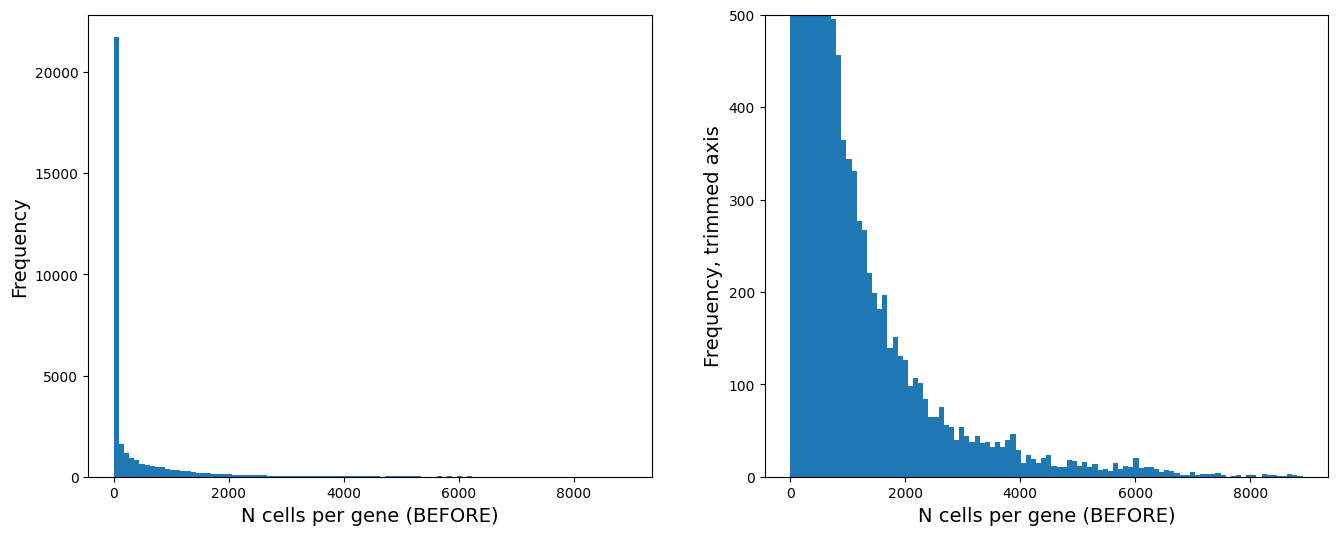

In [26]:
# Distribution of number of genes a cell is expressed in
fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(adata.var['n_cells_by_counts'], 100)
ax.set_xlabel('N cells per gene (BEFORE)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

ax = fig.add_subplot(1, 2, 2)
ax.hist(adata.var['n_cells_by_counts'], 100)
ax.set_xlabel('N cells per gene (BEFORE)', fontsize = 14)
ax.set_ylabel('Frequency, trimmed axis', fontsize = 14)
ax.set_ylim([0, 500])

In [27]:
adata

AnnData object with n_obs × n_vars = 9044 × 33538
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [28]:
# 1. 유전자 수 최소값 기준으로 세포 필터링 (논문 기준: 200개 미만)
sc.pp.filter_cells(adata, min_genes=200)
# 2. 유전자 수 최대값 기준으로 세포 필터링 (논문 기준: 5000개 초과 제거)
sc.pp.filter_cells(adata, max_genes=5000)

In [29]:
adata

AnnData object with n_obs × n_vars = 8812 × 33538
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

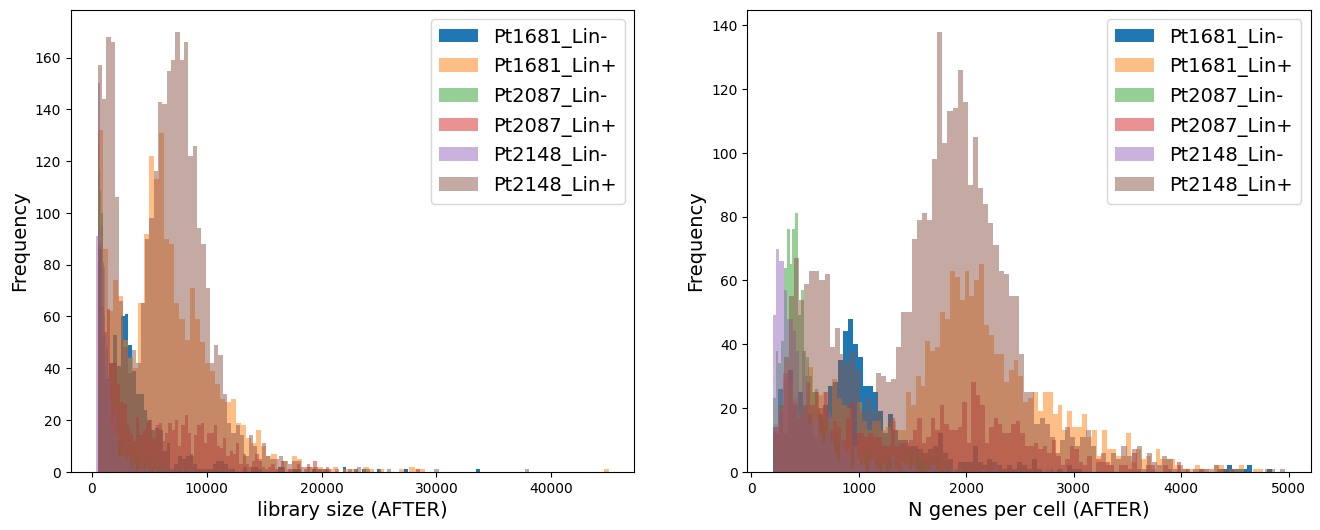

In [30]:
# 필터링 후 결과 1

fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '3'], 100, label = "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['total_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('library size (AFTER)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)
###############
ax = fig.add_subplot(1, 2, 2)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '0'], 100, label = "Pt1681_Lin-")
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '1'], 100, label = "Pt1681_Lin+", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '2'], 100, label = "Pt2087_Lin-", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '3'], 100, label =  "Pt2087_Lin+", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '4'], 100, label = "Pt2148_Lin-", alpha = 0.5)
ax.hist(adata.obs['n_genes_by_counts'][adata.obs['batch_id'] == '5'], 100, label = "Pt2148_Lin+", alpha = 0.5)

ax.set_xlabel('N genes per cell (AFTER)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)

(0.0, 500.0)

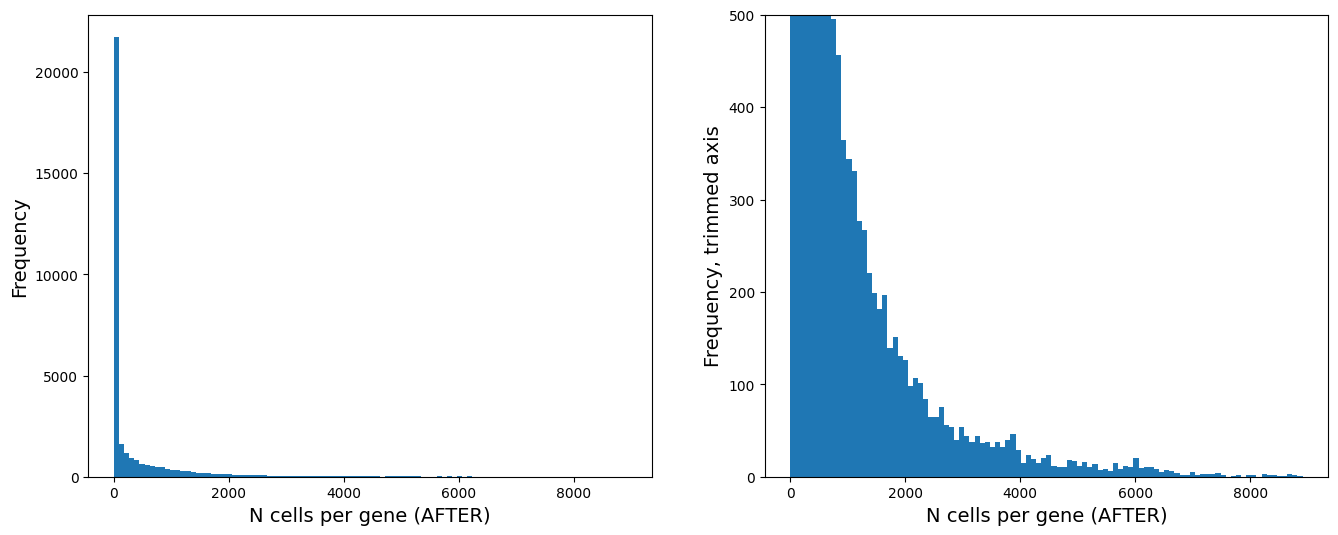

In [31]:
# 필터링 후 결과 2
fig = plt.figure(figsize = (8*2, 6*1))
ax = fig.add_subplot(1, 2, 1)
ax.hist(adata.var['n_cells_by_counts'], 100)
ax.set_xlabel('N cells per gene (AFTER)', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

ax = fig.add_subplot(1, 2, 2)
ax.hist(adata.var['n_cells_by_counts'], 100)
ax.set_xlabel('N cells per gene (AFTER)', fontsize = 14)
ax.set_ylabel('Frequency, trimmed axis', fontsize = 14)
ax.set_ylim([0, 500])

# % mito

In [32]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') # 미토콘드리아 RNA만 mt 열에 저장

In [33]:
adata.var_names[adata.var['mt']] # 미토콘드리아 RNA만 선택되었는지 확인

Index(['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3',
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object')

In [34]:
# 각 세포의 % of mito content 계산
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [35]:
adata

AnnData object with n_obs × n_vars = 8812 × 33538
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

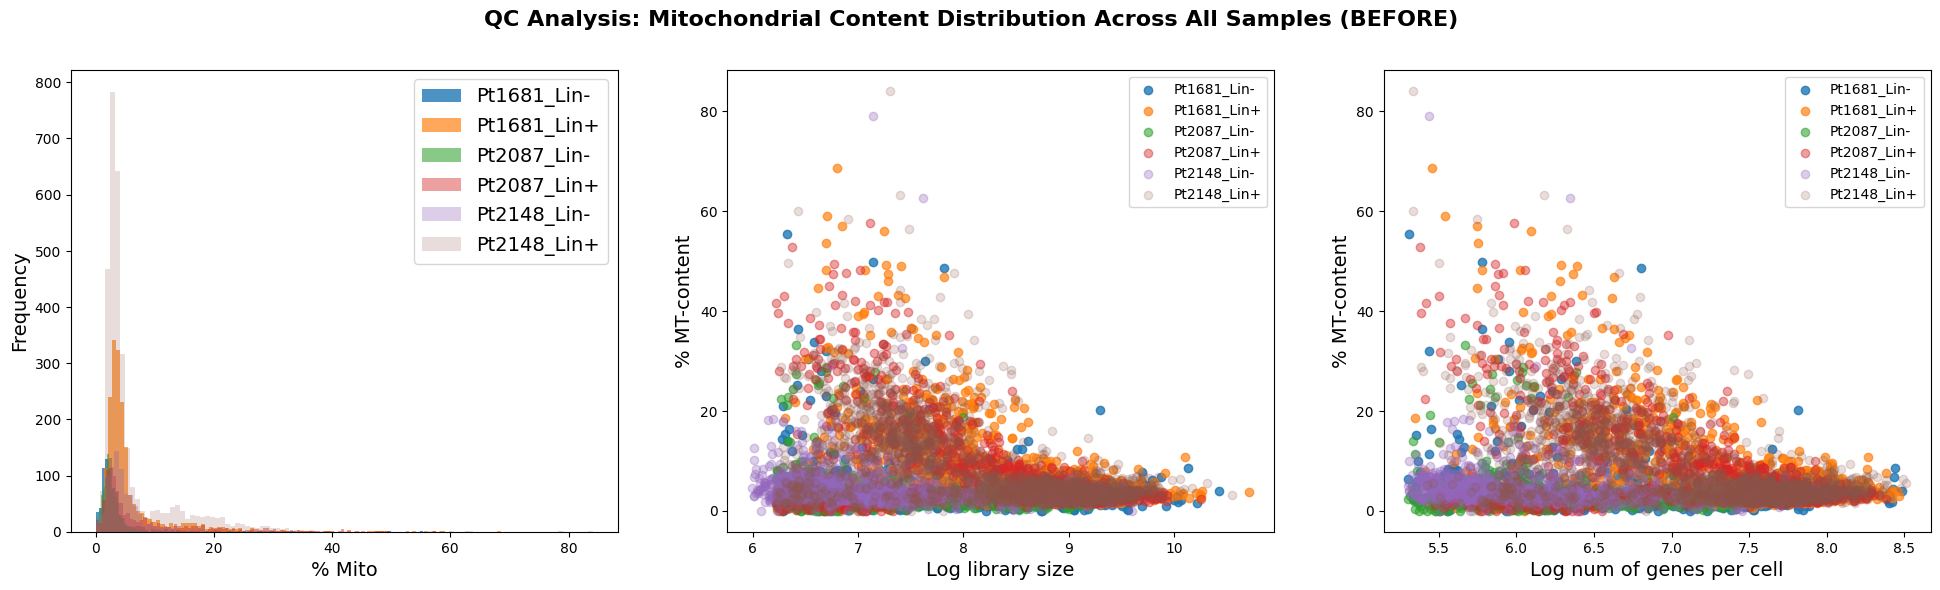

In [36]:
# Distribution of Mitochondrial content

label_dict = {
    '0': 'Pt1681_Lin-',
    '1': 'Pt1681_Lin+',
    '2': 'Pt2087_Lin-',
    '3': 'Pt2087_Lin+',
    '4': 'Pt2148_Lin-',
    '5': 'Pt2148_Lin+'
}

fig = plt.figure(figsize = (8*3, 6*1))

fig.suptitle('QC Analysis: Mitochondrial Content Distribution Across All Samples (BEFORE)', fontsize=16, fontweight='bold')

ax = fig.add_subplot(1, 3, 1)

for i, lab in label_dict.items():

    ax.hist(adata.obs['pct_counts_mt'][adata.obs['batch_id'] == i], 100, label = lab, alpha = 0.8 - 0.12 * int(i))

ax.set_xlabel('% Mito', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)

ax = fig.add_subplot(1, 3, 2)
for i, lab in label_dict.items():

    ax.scatter(adata.obs[adata.obs['batch_id'] == i]['log1p_total_counts'], adata.obs[adata.obs['batch_id'] == i]['pct_counts_mt'], label = lab, alpha= 0.8 - 0.12 * int(i))

ax.set_xlabel('Log library size', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)
ax.legend()

ax = fig.add_subplot(1, 3, 3)
for i, lab in label_dict.items():
      ax.scatter(adata.obs[adata.obs['batch_id'] == i]['log1p_n_genes_by_counts'], adata.obs[adata.obs['batch_id'] == i]['pct_counts_mt'], label = lab, alpha = 0.8 - 0.12 * int(i))

ax.set_xlabel('Log num of genes per cell', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)
ax.legend()

In [37]:
adata

AnnData object with n_obs × n_vars = 8812 × 33538
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

In [38]:
# 3. 미토콘드리아 비율 기준으로 세포 필터링 (논문 기준: 5% 초과 제거)
adata = adata[adata.obs.pct_counts_mt <= 5, :]

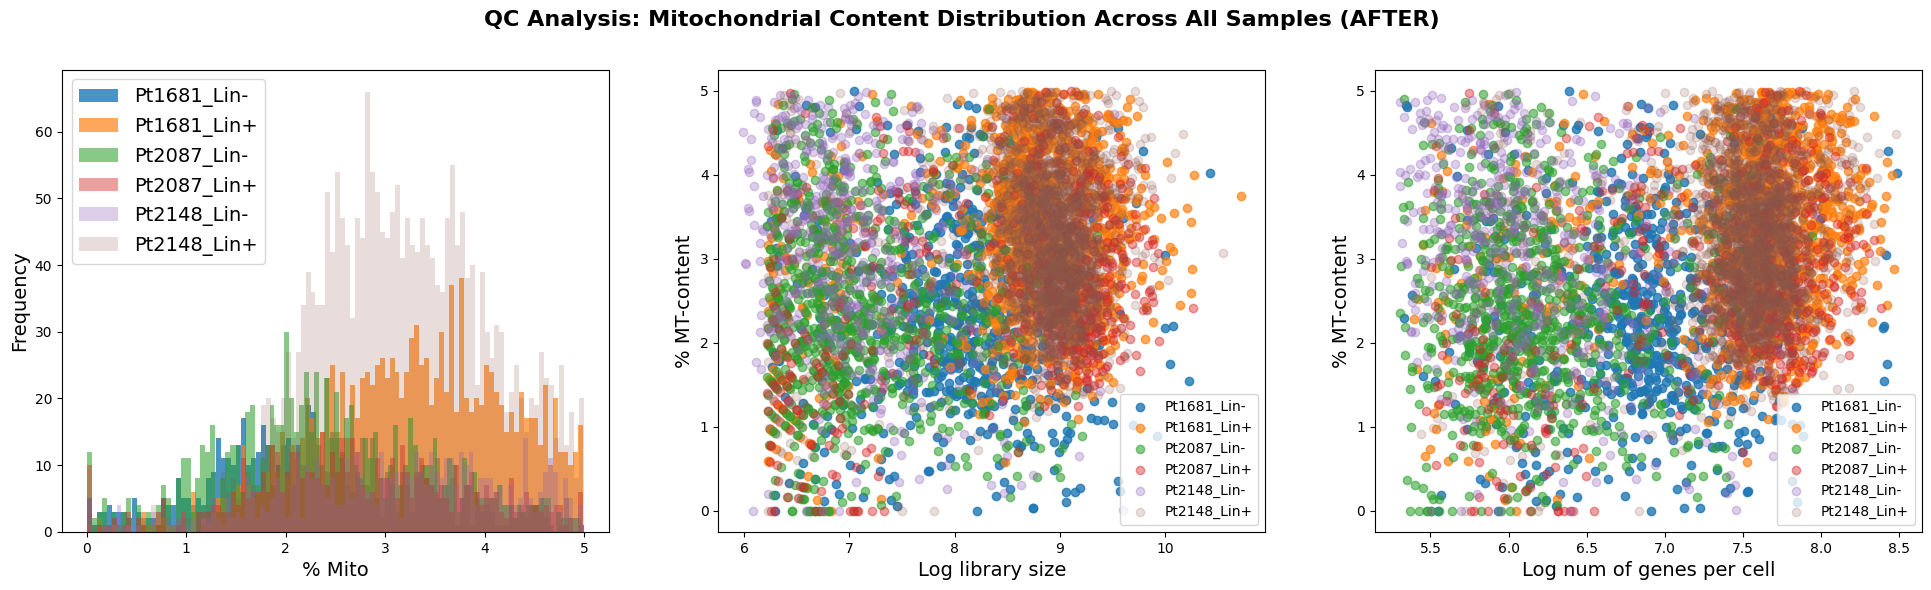

In [39]:
# 필터링 후 결과 3

label_dict = {
    '0': 'Pt1681_Lin-',
    '1': 'Pt1681_Lin+',
    '2': 'Pt2087_Lin-',
    '3': 'Pt2087_Lin+',
    '4': 'Pt2148_Lin-',
    '5': 'Pt2148_Lin+'
}

fig = plt.figure(figsize = (8*3, 6*1))

fig.suptitle('QC Analysis: Mitochondrial Content Distribution Across All Samples (AFTER)', fontsize=16, fontweight='bold')

ax = fig.add_subplot(1, 3, 1)

for i, lab in label_dict.items():

    ax.hist(adata.obs['pct_counts_mt'][adata.obs['batch_id'] == i], 100, label = lab, alpha = 0.8 - 0.12 * int(i))

ax.set_xlabel('% Mito', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.legend(fontsize = 14)

ax = fig.add_subplot(1, 3, 2)
for i, lab in label_dict.items():

    ax.scatter(adata.obs[adata.obs['batch_id'] == i]['log1p_total_counts'], adata.obs[adata.obs['batch_id'] == i]['pct_counts_mt'], label = lab, alpha= 0.8 - 0.12 * int(i))

ax.set_xlabel('Log library size', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)
ax.legend()

ax = fig.add_subplot(1, 3, 3)
for i, lab in label_dict.items():
      ax.scatter(adata.obs[adata.obs['batch_id'] == i]['log1p_n_genes_by_counts'], adata.obs[adata.obs['batch_id'] == i]['pct_counts_mt'], label = lab, alpha = 0.8 - 0.12 * int(i))

ax.set_xlabel('Log num of genes per cell', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)
ax.legend()

In [40]:
adata

View of AnnData object with n_obs × n_vars = 6292 × 33538
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

In [41]:
# 4. Ribosomal gene 제거
# ribosomal genes 있는지 확인 (RPS or RPL로 시작함. human genome에서)
adata.var['ribo'] = adata.var_names.str.startswith(('RPS', 'RPL'))

/tmp/ipython-input-2087761125.py:3: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['ribo'] = adata.var_names.str.startswith(('RPS', 'RPL'))


In [42]:
adata = adata[:, ~adata.var_names.str.startswith(('RPS', 'RPL'))]

In [43]:
adata

View of AnnData object with n_obs × n_vars = 6292 × 33434
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo'

In [44]:
# 5. 10개 미만의 세포에서만 발현된 유전자 제거
sc.pp.filter_genes(adata, min_cells=10)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:293: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [45]:
adata # 유전자 수가 거의 절반으로 줄어들었음

AnnData object with n_obs × n_vars = 6292 × 15703
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'n_cells'

# Doublet detection by Scrublet

In [46]:
sc.pp.scrublet(adata,
               batch_key='batch_id',
               random_state=0)

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adat

In [47]:
adata

AnnData object with n_obs × n_vars = 6292 × 15703
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'n_cells'
    uns: 'scrublet'

In [48]:
# 필터링 후의 QC metrics 계산 (필터링 후 통계 계산)
post_median = adata.obs[qc_metrics].median()
post_n_obs = adata.n_obs


# 최종 요약 테이블 구성
# 결과를 딕셔너리로 모아서 DataFrame 생성
summary_data = {
    'Metric': [
        'Median N Genes per Cell',
        'Median Total UMI Counts',
        'Median Mitochondrial Percentage',
        'Total Number of Cells'
    ],
    'Before Filtering (Median)': [
        pre_median['n_genes_by_counts'],
        pre_median['total_counts'],
        pre_median['pct_counts_mt'],
        pre_n_obs
    ],
    'After Filtering (Median)': [
        post_median['n_genes_by_counts'],
        post_median['total_counts'],
        post_median['pct_counts_mt'],
        post_n_obs
    ]
}

qc_summary_table = pd.DataFrame(summary_data).set_index('Metric')

In [49]:
qc_summary_table

,Before Filtering (Median),After Filtering (Median)
Metric,,
Median N Genes per Cell,1394.000000,1686.000000
Median Total UMI Counts,4214.000000,5651.000000
Median Mitochondrial Percentage,3.584568,2.955891
Total Number of Cells,9044.000000,6292.000000


# Normalization

In [50]:
# raw count 따로 저장해놓기
adata.layers['raw_counts'] = adata.X.copy()

In [51]:
# Normalizing + log transformation

# Normalize with median library size
sc.pp.normalize_total(adata, inplace = True)

# Log transform
sc.pp.log1p(adata)

In [52]:
adata

AnnData object with n_obs × n_vars = 6292 × 15703
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'n_cells'
    uns: 'scrublet', 'log1p'
    layers: 'raw_counts'

In [53]:
# 2. 스케일링 (Scaling)
# 각 유전자의 평균을 0, 분산을 1로 맞춤
# max_value=10은 이상치(outliers)의 영향을 제한
# 이 단계가 PCA를 위해 필수적임
sc.pp.scale(adata, max_value=10) # 10으로 outlier 제거


/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


# Highly variable genes, PCA, Nearest Neighbor Graph, UMAP, Leiden

In [54]:
!pip install python-igraph

In [55]:
!pip install leidenalg

In [56]:
# HVG selection (논문 Seurat v3 방식)
sc.pp.highly_variable_genes(adata, layer='raw_counts', n_top_genes=4000, flavor='seurat_v3')





In [57]:
# PCA
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


Text(0, 0.5, '% Variance Explained')

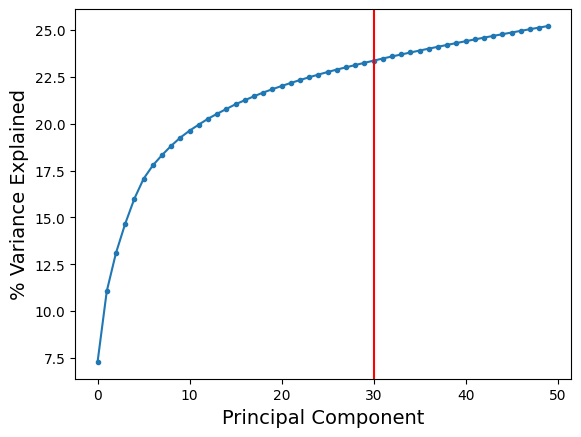

In [58]:
plt.plot(range(len(adata.uns['pca']['variance_ratio'])), np.cumsum(adata.uns['pca']['variance_ratio']) * 100, '.-')
plt.axvline(30, color = 'r')
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% Variance Explained', fontsize = 14)

In [59]:
adata.obsm['X_pca'] = adata.obsm['X_pca'][:, 0:30]

In [60]:
# Nearest neighbors on PCA
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca', metric='euclidean', key_added='neighbors_30')

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


In [61]:
# UMAP using the nearest neighbors
sc.tl.umap(adata, neighbors_key = 'neighbors_30', min_dist=0.1)

In [62]:
sc.tl.leiden(adata, resolution = 1, random_state = 0, neighbors_key='neighbors_30')

/tmp/ipython-input-4188357463.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 1, random_state = 0, neighbors_key='neighbors_30')


In [63]:
adata

AnnData object with n_obs × n_vars = 6292 × 15703
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'n_cells', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors_30', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'neighbors_30_distances', 'neighbors_30_connectivities'

# Batch correction using harmony

In [64]:
sc.external.pp.harmony_integrate(adata,
                                 key = 'batch_id',
                                 basis='X_pca',
                                 adjusted_basis='X_pca_harmony')

2025-10-18 08:47:25,494 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2025-10-18 08:47:31,592 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-10-18 08:47:31,707 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-10-18 08:47:40,337 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-10-18 08:47:45,032 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2025-10-18 08:47:48,131 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2025-10-18 08:47:54,306 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2025-10-18 08:47:57,105 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2025-10-18 08:48:01,193 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2025-10-18 08:48:03,528 - 

# Recompute the neighbors and UMAP on the above computed X_pca_harmony

In [65]:
# Nearest neighbors on PCA_harmony
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca_harmony', metric='euclidean', key_added='neighbors_30_harmony')

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


In [69]:
# UMAP using the nearest neighbors
# Make sure to provide key_added parameter below to prevent overwriting original UMAP
sc.tl.umap(adata, neighbors_key = 'neighbors_30_harmony', min_dist=0.1, key_added='umap_harmony')

In [68]:
adata

AnnData object with n_obs × n_vars = 6292 × 15703
    obs: 'batch_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'n_cells', 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors_30', 'umap', 'leiden', 'neighbors_30_harmony', 'X_umap_harmony', 'umap_harmony'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony', 'X_umap_harmony', 'umap_harmony'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'neighbors_30_distances', 'neighbors_30_connectivities', 'neighbors_30_harmony_distances', 'neigh

# Leiden clusterting after harmony batch correction

In [71]:
sc.tl.leiden(adata, resolution=0.5, neighbors_key='neighbors_30_harmony' ,key_added='leiden_harmony')

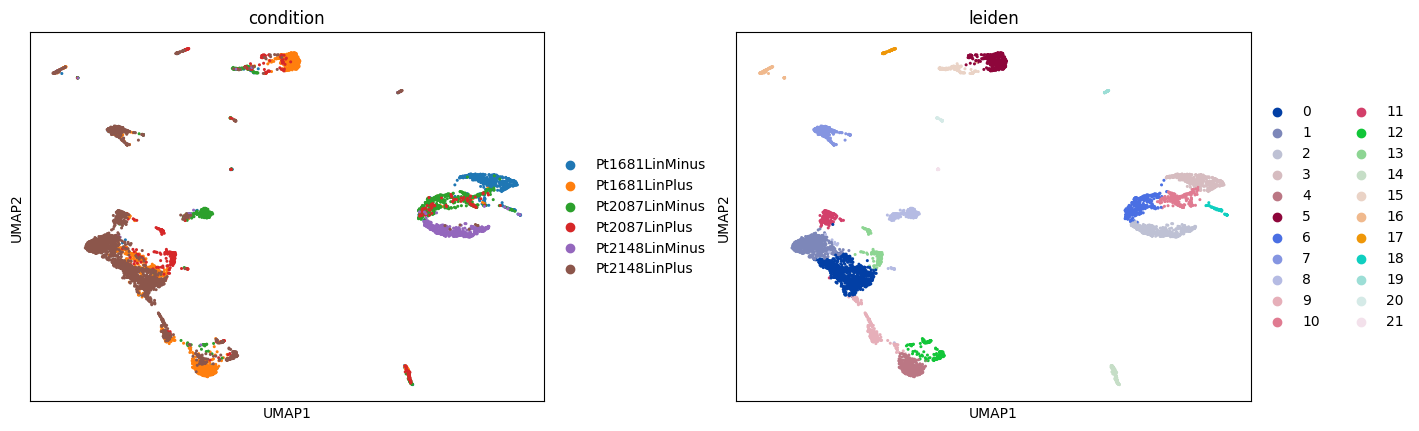

In [72]:
sc.pl.umap(adata, color = ['condition', 'leiden'], wspace = 0.25) # before batch correction

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


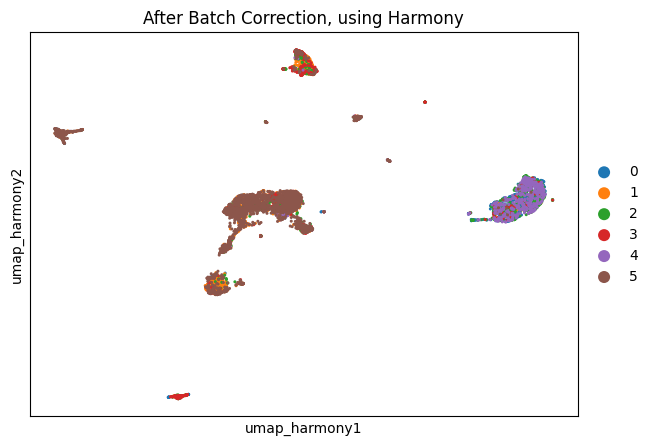

In [73]:
sc.pl.scatter(adata, basis = 'umap_harmony', color = ['batch_id'], title = 'After Batch Correction, using Harmony')

# Cell Annotation (cell typing)

## DEG

In [77]:
# Differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby='leiden_harmony', method = 'wilcoxon', key_added='cluster_vs_rest')

In [89]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '7').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MS4A1,28.021215,17.285013,8.961559e-173,3.005528e-168
1,CD79A,27.953878,17.589602,5.914229e-172,9.917570e-168
2,CD79B,27.416777,10.408968,1.730553e-165,1.934643e-161
3,IGHM,27.001852,52.294498,1.405681e-160,1.178593e-156
4,CD74,26.896801,73.170418,2.393837e-159,1.605690e-155
5,HLA-DRA,26.778343,38.014946,5.776818e-158,3.229049e-154
6,CD37,26.353188,18.175480,4.718285e-153,2.260598e-149
7,HLA-DPA1,26.261351,17.511982,5.303187e-152,2.223228e-148
8,HLA-DPB1,26.238560,17.055883,9.654753e-152,3.597790e-148
9,HLA-DQA1,25.777479,7.990608,1.586351e-146,5.320305e-143


In [74]:
# 기존 immune cell 마커 + epithelial/CTC 마커 포함
cell_types = {
    'Naive_CD4_T': ['CD3E', 'IL7R', 'CCR7', 'CD4'],
    'CD8_T': ['CD8A', 'GZMB', 'GZMA', 'PRF1'],
    'NK_cells': ['NCAM1', 'KLRG1', 'NKG7', 'GZMA'],
    'Myeloid': ['CD14', 'CD68', 'CCR5', 'FCGR3A'],
    'B_cells': ['MS4A1', 'CD19', 'CD79A', 'BANK1'],
    'Platelets': ['PPBP', 'PF4'],

    # 추가: Epithelial / CTC 후보 마커
    'Epithelial/CTC': ['EPCAM', 'KRT8', 'KRT18', 'KRT19', 'MUC1', 'VIM'],
    # House keeping genes 추가
    'House keeping genes' : [
    'ACTB',   # β-actin
    'GAPDH',  # Glyceraldehyde 3-phosphate dehydrogenase
    'RPL13A', # Ribosomal protein L13a
    'B2M',    # Beta-2-microglobulin
    'HPRT1'   # Hypoxanthine phosphoribosyltransferase 1
],
        # Proliferating / cell cycle cluster (Unknown)
    'Proliferating': [
        'MKI67', 'TYMS', 'CDT1', 'TOP2A', 'RRM2', 'PCLAF', 'CDC6',
        'NCAPG', 'MYBL2', 'NUSAP1', 'TK1', 'BIRC5', 'ASPM', 'CEP55', 'ZWINT'
    ],
    'Activated_Myeloid' : [
    'NAMPT', 'CXCL8', 'CSF3R', 'SLC25A37', 'NEAT1', 'G0S2',
    'S100A8', 'S100A9', 'SAT1', 'NABP1', 'PHACTR1', 'FCGR3B',
    'RGS2', 'LRRK2', 'ACSL1', 'PTGS2', 'PTPRE', 'SORL1', 'BCL6', 'RNF149'
],
    'Megakaryocyte_Precursor' : [
    'HIST1H4H', 'H3F3A', 'HIST1H2BN', 'UBE2B', 'KIFAP3', 'BNIP3L',
    'RBX1', 'GADD45A', 'ID2', 'CREBRF', 'CXCL3', 'HERC1', 'HEMGN', 'EGFL7', 'GP1BA'
],
    'Hematopoietic_Progenitor' : [
    'ATP10D', 'NEAT1', 'CSF2RB', 'HDC', 'NAMPT', 'ABHD5', 'IRF1',
    'TMEM154', 'CLK1', 'DUSP6', 'GATA2', 'TP53INP1', 'SAT1',
    'RUNX1', 'AKAP12', 'JAK2', 'PDLIM5', 'BAZ2B', 'SAMSN1', 'GCSAML'
],
    'Absent in CTC':['PTPRC']


}


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:2074: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in [*adata.obs_keys(), adata.obs.index.name]:
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_dendrogram.py:123: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in adata.obs_keys():


categories: 0, 1, 2, etc.
var_group_labels: Naive_CD4_T, CD8_T, NK_cells, etc.


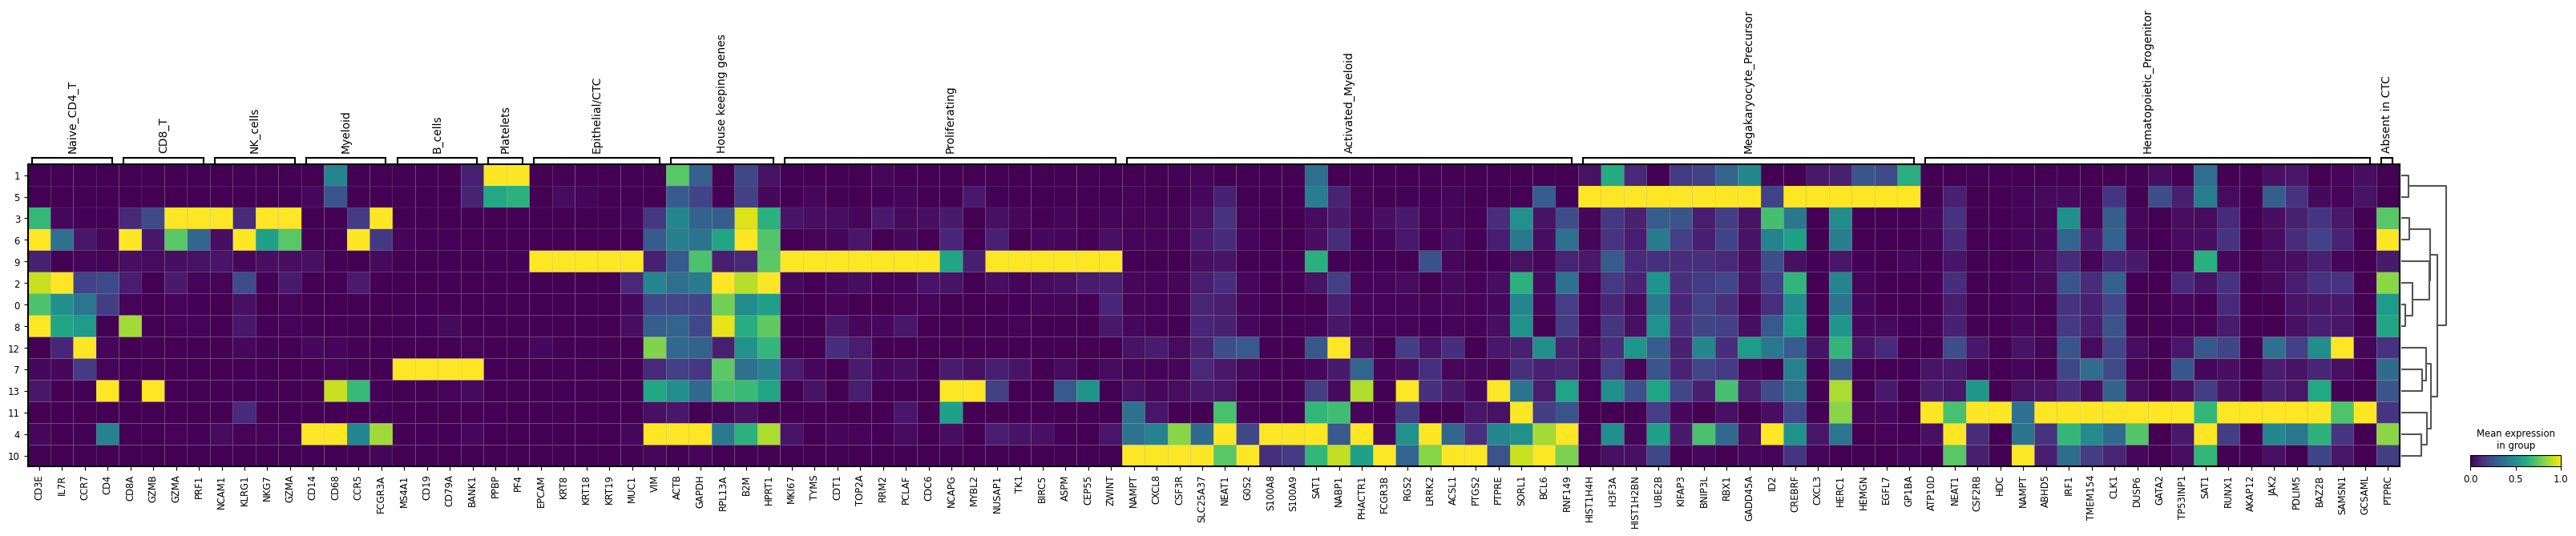

In [75]:
sc.pl.matrixplot(adata, groupby='leiden_harmony', var_names=cell_types, standard_scale='var', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: Naive_CD4_T, CD8_T, NK_cells, etc.


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:2074: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in [*adata.obs_keys(), adata.obs.index.name]:


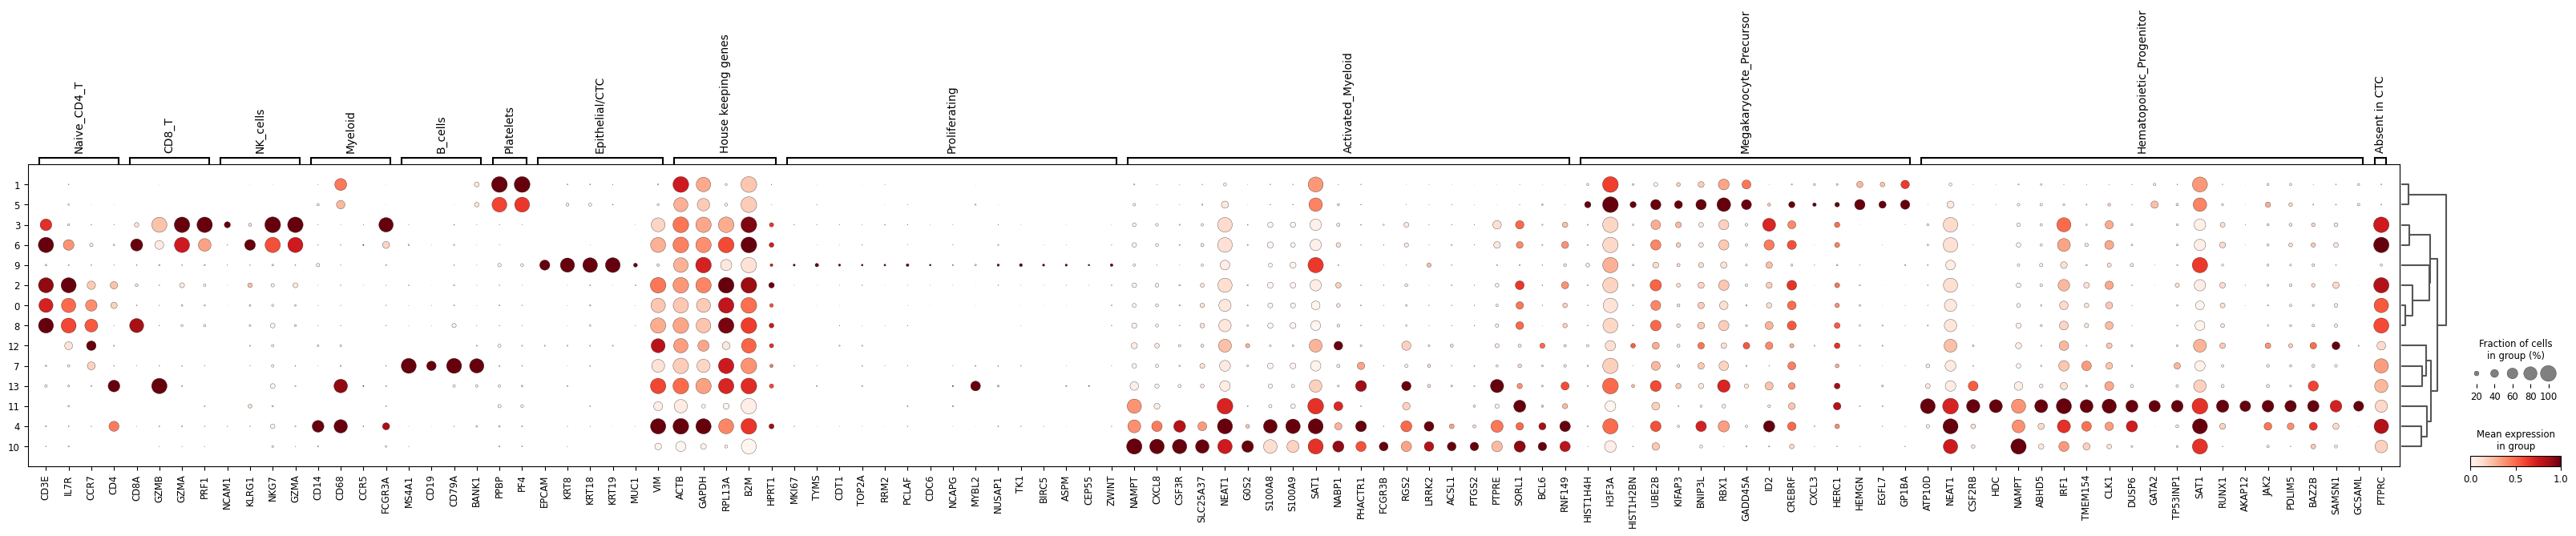

In [76]:
sc.pl.dotplot(adata, groupby='leiden_harmony', var_names=cell_types, standard_scale='var', dendrogram=True)

In [80]:
cluster_map = {'0': 'Naive_CD4_T',
               '1':'Platelets',
               '2': 'Naive_CD4_T',
               '3': 'T/NK',
               '4': 'Myeloid',
               '5': 'Platelets',
               '6': 'T/NK',
               '7': 'B cells',
               '8': 'Naive_CD4_T',
               '9': 'CTC',
               '10': 'Activated Myeloid',
               '11': 'Hematopoietic progenitor',
               '12': 'Mature Dendritic Cell',
               '13': 'CD_8 T',
               }

In [83]:
adata.obs['celltype'] = adata.obs['leiden_harmony'].map(cluster_map)

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:397: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if key in adata.obs_keys():


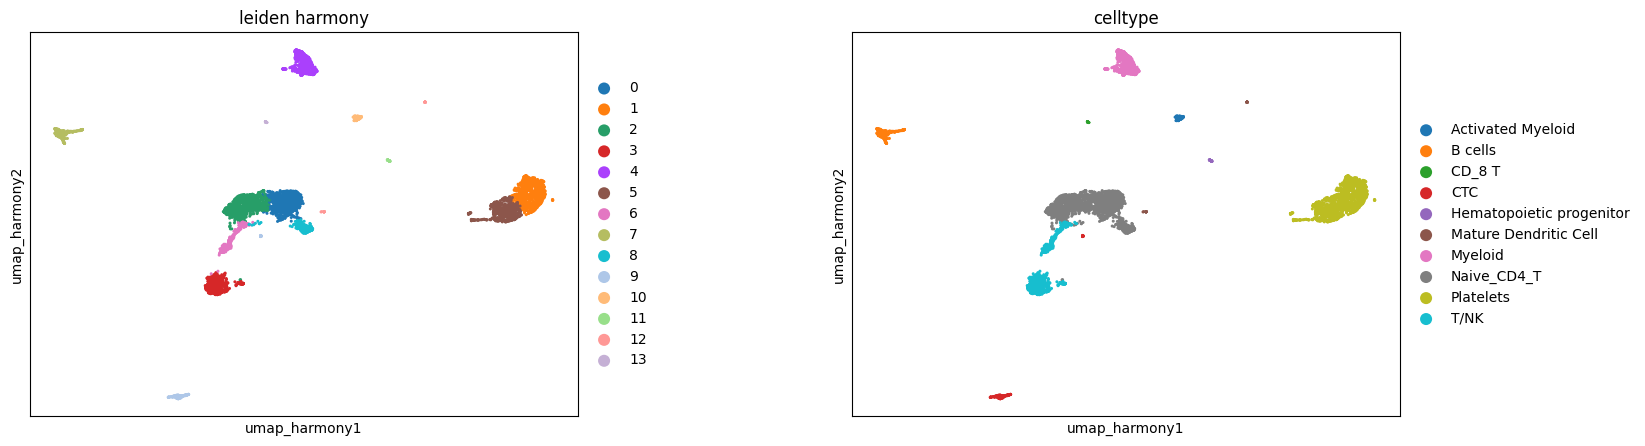

In [86]:
sc.pl.scatter(
    adata,
    basis='umap_harmony',         # 배치 보정 후 UMAP 좌표
    color=['leiden_harmony', 'celltype']  # 배치 보정 후 클러스터

)


# Check DEGs in CTC cluster

In [88]:
sc.get.rank_genes_groups_df(adata, group='9', key = 'cluster_vs_rest').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,KRT19,21.709826,46.843018,1.656859e-104,5.556773e-100
1,MGP,21.663952,383.735413,4.490093e-104,7.529438e-100
2,KRT18,21.370085,23.225315,2.536668e-101,2.835826e-97
3,CRABP2,20.960869,20.949528,1.493359e-97,1.252107e-93
4,KRT8,20.434158,14.298410,8.311362e-93,5.574929e-89
5,TACSTD2,19.497219,38.125732,1.159154e-84,6.479283e-81
6,KRT7,18.849474,17.639467,2.967736e-79,1.244149e-75
7,ID1,18.519140,12.584826,1.447294e-76,5.393262e-73
8,ID3,18.494444,12.050934,2.288897e-76,7.676504e-73
9,FXYD3,18.027239,11.702705,1.190921e-72,3.328425e-69


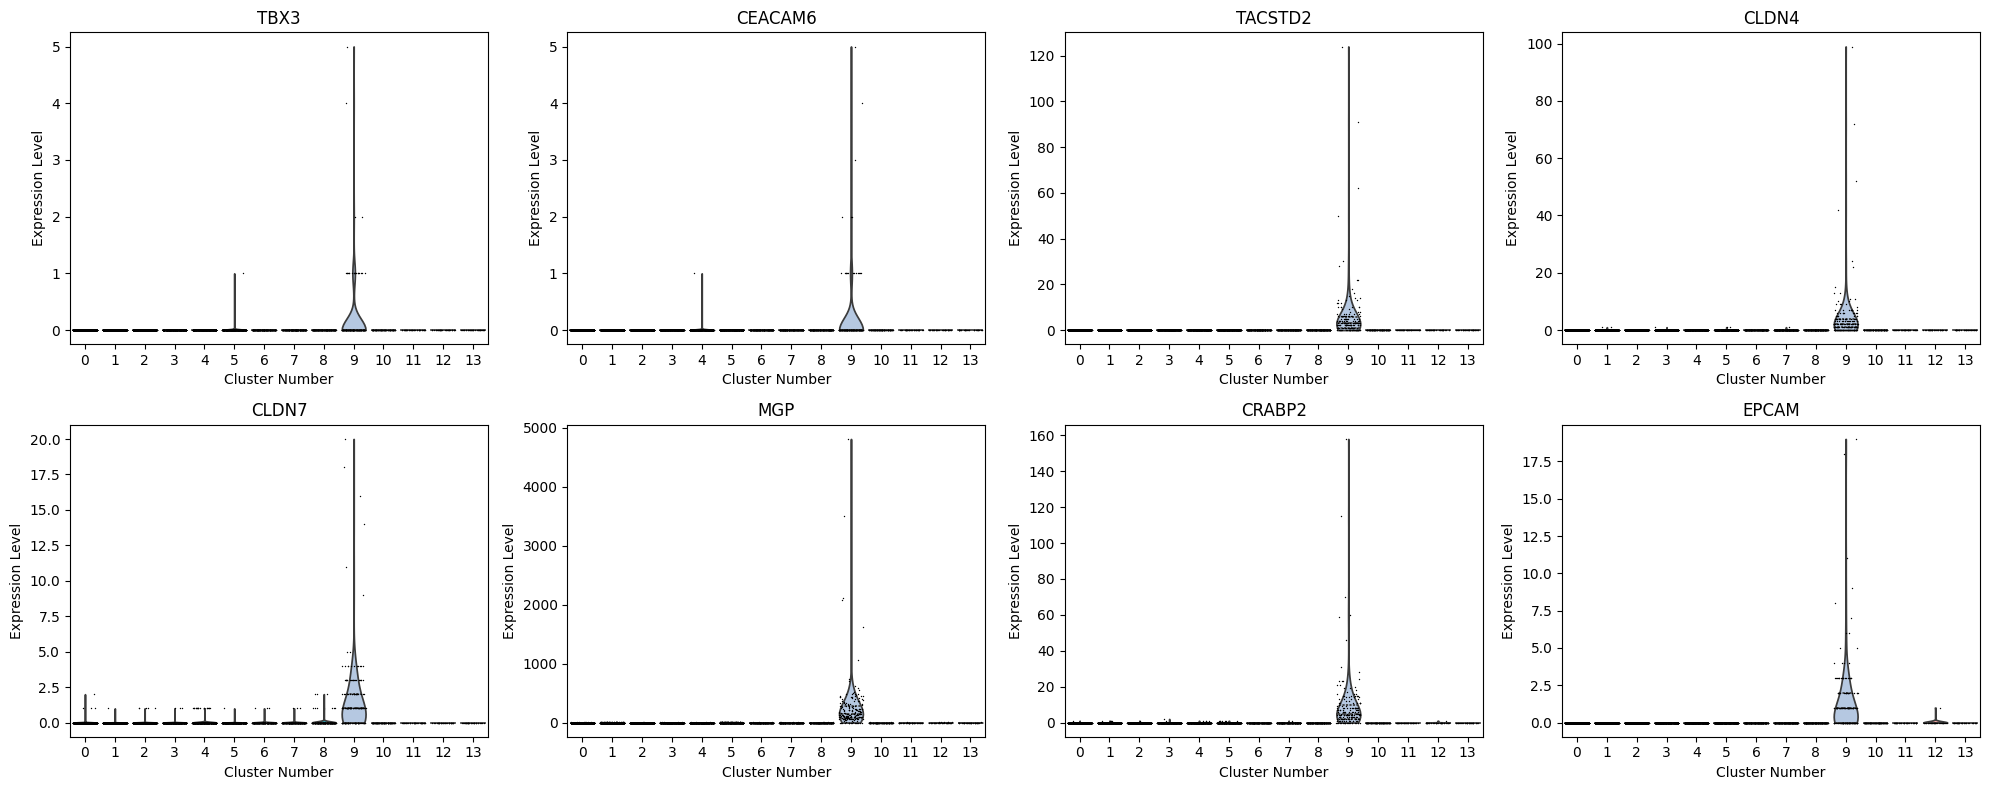

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# 8개의 CTC / Epithelial marker
ctc_markers = ['TBX3', 'CEACAM6', 'TACSTD2', 'CLDN4', 'CLDN7', 'MGP', 'CRABP2', 'EPCAM']

# Figure 2행 4열 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# 각 marker별 Violin Plot
for i, marker in enumerate(ctc_markers):
    sc.pl.violin(
        adata,
        keys=[marker],
        groupby='leiden_harmony',  # batch-corrected cluster 기준
        jitter=0.4,
        stripplot=True,
        inner='quartile',
        ax=axes[i],
        show=False
    )
    axes[i].set_title(marker, fontsize=12)

# x축 레이블 한 번에
for ax in axes:
    ax.set_xlabel("Cluster Number", fontsize=10)
    ax.set_ylabel("Expression Level", fontsize=10)

plt.tight_layout()
plt.show()


# 4. Characterization of CTC Gene Expression Signature

In [98]:
# 'leiden_harmony' 클러스터 중 CTC 클러스터만 비교
ctc_cluster = '9'

# DEGs 계산
sc.tl.rank_genes_groups(
    adata,
    groupby='leiden_harmony',
    groups=[ctc_cluster],   # CTC 클러스터만
    reference='rest',       # 나머지 클러스터와 비교
    method='wilcoxon',
    key_added='CTC_vs_rest'
)

# 결과를 DataFrame으로
ctc_deg = sc.get.rank_genes_groups_df(adata, group='9', key='CTC_vs_rest')

# 상위 20개 유전자 선택 (logFC 높은 순 & p-value 낮은 순)
top20_ctc_genes = ctc_deg.sort_values(['logfoldchanges', 'pvals_adj'], ascending=[False, True]).head(20)
print(top20_ctc_genes[['names', 'logfoldchanges', 'pvals_adj']])

          names  logfoldchanges      pvals_adj
1           MGP      383.735413  7.529438e-100
0         KRT19       46.843018  5.556773e-100
5       TACSTD2       38.125732   6.479283e-81
57        WFDC2       30.784437   2.260074e-23
59        AZGP1       30.444202   8.001446e-23
100        SOX9       30.067699   1.028508e-13
106      TFAP2B       29.814728   2.656014e-13
120        IRS4       29.376350   4.203023e-12
181        SDC1       29.263405   3.079734e-07
160        RND3       29.204861   3.612336e-08
171      HMGCS2       29.185017   1.527964e-07
148         CPE       28.998228   1.632232e-09
172        BMP5       28.998228   1.527964e-07
182      STEAP1       28.696877   3.079734e-07
227  AL035425.2       28.431124   2.744599e-05
222        CA12       28.402493   1.511786e-05
228      STMND1       28.373434   2.744599e-05
229       FOXA1       28.283554   2.744599e-05
260        RERG       28.252634   1.484690e-04
275        AQP5       28.189243   2.558758e-04


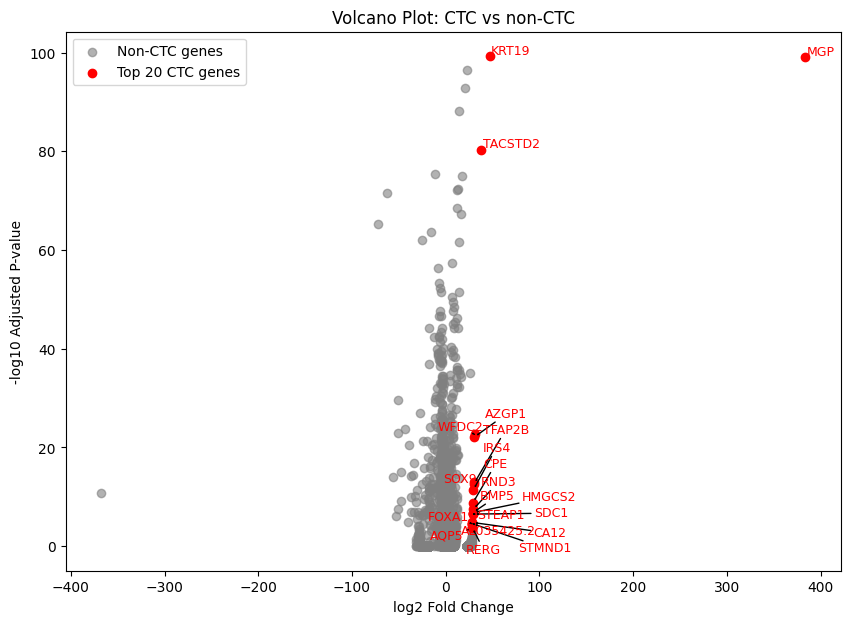

In [ ]:
!pip install adjustText
from adjustText import adjust_text

# -log10 변환
ctc_deg['-log10(pval)'] = -np.log10(ctc_deg['pvals_adj'])

plt.figure(figsize=(10,7))

# 나머지 유전자 (Non-CTC)
plt.scatter(
    ctc_deg.loc[~ctc_deg['names'].isin(top20_ctc_genes['names']), 'logfoldchanges'],
    ctc_deg.loc[~ctc_deg['names'].isin(top20_ctc_genes['names']), '-log10(pval)'],
    color='grey', alpha=0.6, label='Non-CTC genes'
)

# 상위 20개 CTC 특이 유전자
top_genes = ctc_deg[ctc_deg['names'].isin(top20_ctc_genes['names'])]
plt.scatter(
    top_genes['logfoldchanges'],
    top_genes['-log10(pval)'],
    color='red',
    label='Top 20 CTC genes'
)

# 각 빨간 점에 유전자 이름 표시 
texts = []
for i, row in top_genes.iterrows():
    texts.append(
        plt.text(
            row['logfoldchanges'],
            row['-log10(pval)'],
            row['names'],
            fontsize=9,
            color='red'
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('log2 Fold Change')
plt.ylabel('-log10 Adjusted P-value')
plt.title('Volcano Plot: CTC vs non-CTC')
plt.legend()
plt.show()
